# Trabajo Práctico Final
## Aprendizaje Profundo
## Ejercicio 3


##  Cohorte : 6Co2022

### Marcelo Chichiri

#### Enunciado
Descargar el dataset desde el siguiente link. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

a)	Entrenar un modelo de deep learning que no utilice embeddings. \
b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.\
c)	Compare el score de cada modelo y comente lo necesario.


#### a) Entrenar un modelo de deep learning que no utilice embeddings.
Para el entrenamiento de una red sin embedding se utilizó un modelo de red neuronal con las siguientes topología 
  * Una capa de entrada de 22 neuronas
  * Una capa oculta de 200 neuronas con función de activación ReLU
  * Una capa oculta de 100 neuronas con función de activación ReLU
  * Una capa de salida con una neurona
  
    Los features Gender, Age, Stay_In_Current_City_Years, City_Category se convirtieron a One Hot. \
    El feature Product_Category_3 se eliminó por tener casi el 70% de valores nulos.\
    El feature Product_Category_2, con el 31% de valores nulos, se completó con el valor medio.\
    El feature User_ID, se eliminó por ser un feature con 3631 valores categóricos.\
    El feature Purchase fue reemplazado por 0 si su valor es menor a 900 y por 1 si es igual o mayor a ese valor.

    Se utilizó el 70% de los datos para entrenamiento, 20% para validación y 10% para test.
    
    Esta red entrenada con 35 épocas llegó a un error mínimo de 0.309 en training, 0.310 en validación y 0.316 test.


#### b) Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
Para el entrenamiento de una red con embedding en User_ID y Product_ID se utilizó un modelo de red neuronal con las siguientes topología 
  * Una capa de entrada de 21 neuronas mas 8 y 6 neuronas para embedding.
  * Una capa oculta de 30 neuronas con funcion de activación ReLU
  * Una capa de dropout con 30% de probabilidades
  * Una capa oculta de 5 neuronas con funcion de activación ReLU
  * Una capa de dropout con 30% de probabilidades
  * Una capa de salida
  
    Los fetures Gender, Age, Stay_In_Current_City_Years, City_Category se convirtieron a One Hot. \
    El feature Product_Category_3 se eliminó por tener casi el 70% de valores nulos.\
    El feature Product_Category_2, con el 31% de valores nulos, se completó con el valor medio.\
    El feature Purchase fue reemplazado por 0 si su valor es menor a 900 y por 1 si es igual o mayor a ese valor.\
    Se realizó el mapeo de los features User_ID y Product_ID para la capa de embedded y se eliminaron esos features del dataset.\
    Se utilizó el 70% de los datos para entrenamiento, 20% para validadción y 10% para test.
    
    Esta red entrenada con 35 epocas llegó a un error mínimo de 0.257 en traing y 0.274 en validación y 0.273 test. 


#### c)	Compare el score de cada modelo y comente lo necesario.

Se observaron las siguientes métricas de error mínimo (err) y auc tanto en training como en validación y el error en test                 
Sin embedded : Training: err: 0.309 | auc: 0.930 || Validación: err: 0.310 | auc: 0.930 || Test: 0.316 \
Con embedded : Training: err: 0.257 | auc: 0.955 || Validación: err: 0.274 | auc: 0.953 || Test: 0.273 

Se pudieron apreciar las siguientes diferencias: \
Respecto al Dataset. Para entrenar la red sin embedded fue necesario eliminar la columna User_ID ya que tiene una cardinalidad muy grande para convertir en one hot, en cambio con embedded este feature pudo usarse para entrenar la red.

Respecto al tamaño de la red. La red con embedded es significativamente mas pequeña que la red sin embedded. En la red sin embedded se usaron capas de 200 y 100 neuromas mientras que al usar embedded solo fue necesario una capa de 30 y otra de 5 neuronas. Solo con estas neuronas de la red embedded se produjo overfeeting, por lo cual agregué dropout a la salida de cada capa oculta.

Respecto al tiempo de entrenamiento: Si bien el tiempo de entrenamiento de cada una de las redes es relativo, se pudo ver que el tiempo tomado por la red con embedded fue un poco menor que con la red sin embedded. 622 segundos con embedded versus 680 segundos con la red sin emedded 


## Importacion, analisis y depuracion de datos

In [1]:
# Importa librerias
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [2]:
# Versiones de algunas librerías
print("".join(f"{x[0]}:{x[1]}\n" for x in [
    ("Pandas",pd.__version__),
    ("Numpy",np.__version__),
    ("Seaborn",sns.__version__),
]))

Pandas:1.4.1
Numpy:1.20.3
Seaborn:0.11.2



In [3]:
# Procedimiento para presentar histogramas
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [4]:
# Procedimiento para ver cantidad y porcentaje de nulos en un dataset
def nulos(datax):
    suma_nulls = datax.isnull().sum()
    porcent_nulls = datax.isnull().sum() * 100 / len(datax)
    lista_nulls = pd.DataFrame({'Feature': datax.columns, 'suma_nulls': suma_nulls, 'nulls (%)': round(porcent_nulls, 2)})
    return lista_nulls.sort_values('suma_nulls') 

In [5]:
# Apertura de archivo
data = pd.read_csv('dataset_2.csv', delimiter=',')

In [6]:
# Análisis de filas y columnas 
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset tiene 550068 filas y 12 columnas


In [7]:
# Se imprime los nulos del dataset
print(nulos(data))

                                               Feature  suma_nulls  nulls (%)
User_ID                                        User_ID           0       0.00
Product_ID                                  Product_ID           0       0.00
Gender                                          Gender           0       0.00
Age                                                Age           0       0.00
Occupation                                  Occupation           0       0.00
City_Category                            City_Category           0       0.00
Stay_In_Current_City_Years  Stay_In_Current_City_Years           0       0.00
Marital_Status                          Marital_Status           0       0.00
Product_Category_1                  Product_Category_1           0       0.00
Purchase                                      Purchase           0       0.00
Product_Category_2                  Product_Category_2      173638      31.57
Product_Category_3                  Product_Category_3      3832

In [8]:
# Se muestra el resumen de los datos del dataset actual
print('Encabezados \n')
data.head(50).transpose()

Encabezados 



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
User_ID,1000001,1000001,1000001,1000001,1000002,1000003,1000004,1000004,1000004,1000005,...,1000010,1000010,1000010,1000010,1000010,1000010,1000010,1000011,1000011,1000011
Product_ID,P00069042,P00248942,P00087842,P00085442,P00285442,P00193542,P00184942,P00346142,P0097242,P00274942,...,P00087242,P00111142,P00259342,P0094542,P00148642,P00312142,P00113242,P00192642,P00110842,P00189642
Gender,F,F,F,F,M,M,M,M,M,M,...,F,F,F,F,F,F,F,F,F,F
Age,0-17,0-17,0-17,0-17,55+,26-35,46-50,46-50,46-50,26-35,...,36-45,36-45,36-45,36-45,36-45,36-45,36-45,26-35,26-35,26-35
Occupation,10,10,10,10,16,15,7,7,7,20,...,1,1,1,1,1,1,1,1,1,1
City_Category,A,A,A,A,C,A,B,B,B,A,...,B,B,B,B,B,B,B,C,C,C
Stay_In_Current_City_Years,2,2,2,2,4+,3,2,2,2,1,...,4+,4+,4+,4+,4+,4+,4+,1,1,1
Marital_Status,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
Product_Category_1,3,1,12,12,8,1,1,1,1,8,...,14,1,5,2,6,8,1,8,1,8
Product_Category_2,NaN,6.0,NaN,14.0,NaN,2.0,8.0,15.0,16.0,NaN,...,NaN,15.0,9.0,4.0,10.0,NaN,6.0,17.0,2.0,13.0


In [9]:
# Descripción del dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [10]:
# Información de features 
print('Informacion de cada feature :\n')
data.info()

Informacion de cada feature :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory

In [11]:
# Se muestra la cantidad de features numéricos y categóricos y se muestran los campos
number = 'number'
print(f'Features categoricas : {len(list(data.select_dtypes(exclude = number).columns))}')
print(f'Features numericas : {len(list(data.select_dtypes(include = number).columns))}')

print(f'\nFeatures categoricas : {list(data.select_dtypes(exclude = number).columns)}\n')

print(f'Features numericas : {list(data.select_dtypes(include = number).columns)}')

Features categoricas : 5
Features numericas : 7

Features categoricas : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

Features numericas : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [12]:
# Muestra categorias y cantidad por variable categórica 

print(f'\nFeatures categoricas : {list(data.select_dtypes(exclude = number).columns)}\n')
cat_cols = list(data.select_dtypes(exclude = number).columns) 
for col in cat_cols:
    print(f'{col}, número de categorías: {data[col].nunique()}')
    print(f'categorías: \n {data[col].unique()} \n')

m = len(data)
print(f'\nTotal de observaciones: {m}')



Features categoricas : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

Product_ID, número de categorías: 3631
categorías: 
 ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] 

Gender, número de categorías: 2
categorías: 
 ['F' 'M'] 

Age, número de categorías: 7
categorías: 
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

City_Category, número de categorías: 3
categorías: 
 ['A' 'C' 'B'] 

Stay_In_Current_City_Years, número de categorías: 5
categorías: 
 ['2' '4+' '3' '1' '0'] 


Total de observaciones: 550068


In [13]:
print(f'Purchase antes del cambio : \n{data.Purchase.value_counts()}')
data.Purchase.loc[data.Purchase < 9000] = 0
data.Purchase.loc[data.Purchase >= 9000] = 1
print(f'Purchase despues del cambio : \n{data.Purchase.value_counts()}')

Purchase antes del cambio : 
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64
Purchase despues del cambio : 
0    330871
1    219197
Name: Purchase, dtype: int64


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4608\3793300666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Purchase.loc[data.Purchase < 9000] = 0
C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4608\3793300666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Purchase.loc[data.Purchase >= 9000] = 1


In [14]:
# Descripción del dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,3.984907e-01,0.489588,0.0,0.0,0.0,1.0,1.0


In [15]:
# Se analizan los nulos
nulos(data)

,Feature,suma_nulls,nulls (%)
User_ID,User_ID,0,0.00
Product_ID,Product_ID,0,0.00
Gender,Gender,0,0.00
Age,Age,0,0.00
Occupation,Occupation,0,0.00
City_Category,City_Category,0,0.00
Stay_In_Current_City_Years,Stay_In_Current_City_Years,0,0.00
Marital_Status,Marital_Status,0,0.00
Product_Category_1,Product_Category_1,0,0.00
Purchase,Purchase,0,0.00


In [16]:
# Análisis de filas y columnas 
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset tiene 550068 filas y 12 columnas


In [17]:
# Se generan las features One Hot para Gender
# Se agregan los nuevos features One Hot para Gender y se elimina el feature
data = pd.concat([data,pd.get_dummies(data['Gender'], prefix='Gender')],axis=1)
data.drop(['Gender'],axis=1, inplace=True)

# Descripción del dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,3.984907e-01,0.489588,0.0,0.0,0.0,1.0,1.0
Gender_F,550068.0,2.468949e-01,0.431205,0.0,0.0,0.0,0.0,1.0
Gender_M,550068.0,7.531051e-01,0.431205,0.0,1.0,1.0,1.0,1.0


In [18]:
# Se generan las features One Hot para Age
# Se agregan los nuevos features One Hot para Age y se elimina el feature
data = pd.concat([data,pd.get_dummies(data['Age'], prefix='Age')],axis=1)
data.drop(['Age'],axis=1, inplace=True)

# Descripción del dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,3.984907e-01,0.489588,0.0,0.0,0.0,1.0,1.0
Gender_F,550068.0,2.468949e-01,0.431205,0.0,0.0,0.0,0.0,1.0
Gender_M,550068.0,7.531051e-01,0.431205,0.0,1.0,1.0,1.0,1.0
Age_0-17,550068.0,2.745479e-02,0.163405,0.0,0.0,0.0,0.0,1.0


In [19]:
# Se generan las features One Hot para Age
# Se agregan los nuevos features One Hot para City_Category y se elimina el feature
data = pd.concat([data,pd.get_dummies(data['City_Category'], prefix='City_Category')],axis=1)
data.drop(['City_Category'],axis=1, inplace=True)

# Descripción del dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,3.984907e-01,0.489588,0.0,0.0,0.0,1.0,1.0
Gender_F,550068.0,2.468949e-01,0.431205,0.0,0.0,0.0,0.0,1.0
Gender_M,550068.0,7.531051e-01,0.431205,0.0,1.0,1.0,1.0,1.0
Age_0-17,550068.0,2.745479e-02,0.163405,0.0,0.0,0.0,0.0,1.0


In [20]:
# Se generan las features One Hot para Age
# Se agregan los nuevos features One Hot para Stay_In_Current_City_Years y se elimina el feature
data = pd.concat([data,pd.get_dummies(data['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')],axis=1)
data.drop(['Stay_In_Current_City_Years'],axis=1, inplace=True)

# Descripción del dataset
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,3.984907e-01,0.489588,0.0,0.0,0.0,1.0,1.0
Gender_F,550068.0,2.468949e-01,0.431205,0.0,0.0,0.0,0.0,1.0
Gender_M,550068.0,7.531051e-01,0.431205,0.0,1.0,1.0,1.0,1.0
Age_0-17,550068.0,2.745479e-02,0.163405,0.0,0.0,0.0,0.0,1.0


In [21]:
# Se muestra la cantidad de features numéricos y categóricos y se muestran los campos
number = 'number'
print(f'Features categoricas : {len(list(data.select_dtypes(exclude = number).columns))}')
print(f'Features numericas : {len(list(data.select_dtypes(include = number).columns))}')

print(f'\nFeatures categoricas : {list(data.select_dtypes(exclude = number).columns)}\n')

print(f'Features numericas : {list(data.select_dtypes(include = number).columns)}')

Features categoricas : 1
Features numericas : 24

Features categoricas : ['Product_ID']

Features numericas : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']


In [22]:
print(f'\nFeatures categoricas : {list(data.select_dtypes(include = number).columns)}\n')
cat_cols = list(data.select_dtypes(include = number).columns) 
for col in cat_cols:
    print(f'{col}, número de categorías: {data[col].nunique()}')
    print(f'categorías: \n {data[col].unique()} \n')

m = len(data)
print(f'\nTotal de observaciones: {m}')



Features categoricas : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']

User_ID, número de categorías: 5891
categorías: 
 [1000001 1000002 1000003 ... 1004113 1005391 1001529] 

Occupation, número de categorías: 21
categorías: 
 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

Marital_Status, número de categorías: 2
categorías: 
 [0 1] 

Product_Category_1, número de categorías: 20
categorías: 
 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2, número de categorías: 17
categorías: 
 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10

In [23]:
# Se elimina el feature que mas nulos tiene
data = data.drop(['Product_Category_3'], axis=1)

In [24]:
# Antes de empezar a limpiar los datos me quedo con el vendor ID y con el user ID que se usarn con el 
# modelo con embedding
user_id = data["User_ID"]
product_id = data["Product_ID"]

In [25]:
# Los nulos del feature se reemplazan por el valor medio
feature_cols = ['Product_Category_2']

# Se Eliminan los nulos de cada campo 
for feature in feature_cols: 
    print('Eliminando nulos de ', feature)
    data.loc[data[feature].isna(), feature] = data[feature].mean()


Eliminando nulos de  Product_Category_2


In [26]:
# Se elimina el USer_ID por tener muchas categorias
data = data.drop(['Product_ID'], axis=1)

In [27]:
# Se verifica que no hay nulos en el dataset procesado
nulos(data)

,Feature,suma_nulls,nulls (%)
User_ID,User_ID,0,0.0
Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_2,0,0.0
Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_1,0,0.0
Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_0,0,0.0
City_Category_C,City_Category_C,0,0.0
City_Category_B,City_Category_B,0,0.0
City_Category_A,City_Category_A,0,0.0
Age_55+,Age_55+,0,0.0
Age_51-55,Age_51-55,0,0.0
Age_46-50,Age_46-50,0,0.0


In [28]:
#Se separa el dataset en features (X) y target (y) 

y = data["Purchase"]
X = data.drop(["Purchase"], axis=1) 

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Occupation                     550068 non-null  int64  
 2   Marital_Status                 550068 non-null  int64  
 3   Product_Category_1             550068 non-null  int64  
 4   Product_Category_2             550068 non-null  float64
 5   Gender_F                       550068 non-null  uint8  
 6   Gender_M                       550068 non-null  uint8  
 7   Age_0-17                       550068 non-null  uint8  
 8   Age_18-25                      550068 non-null  uint8  
 9   Age_26-35                      550068 non-null  uint8  
 10  Age_36-45                      550068 non-null  uint8  
 11  Age_46-50                      550068 non-null  uint8  
 12  Age_51-55                     

In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Purchase
Non-Null Count   Dtype
--------------   -----
550068 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [31]:
# Análisis de filas y columnas 
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset tiene 550068 filas y 23 columnas


In [32]:
X_copia = X.copy()

## Normalizado de datos

In [33]:
X = X.to_numpy()

In [34]:
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0)) 

In [35]:
print(X.shape)
print((np.min(X, axis=0)).shape)
print(np.min(X_norm, axis=0))
print(np.max(X_norm, axis=0))

(550068, 22)
(22,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Split en train, validation y test

In [36]:
train_cant = 0.70
valid_cant = 0.20
test_cant = 0.10
n_datos = X.shape[0]
idx = np.random.permutation(np.arange(0, n_datos))
train_idx = idx[0:int(train_cant * n_datos)]
valid_idx = idx[int(train_cant * n_datos): int((train_cant+valid_cant) * n_datos)]
test_idx = idx[int((train_cant+valid_cant) * n_datos):]

In [37]:
print(type(y))
y = np.array(y.tolist())
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [38]:
print('Train')
X_train = X_norm[train_idx]
y_train = y[train_idx]
print(X_train.shape)
print(y_train.shape)

print('Validation')
X_valid = X_norm[valid_idx]
y_valid = y[valid_idx]
print(X_valid.shape)
print(y_valid.shape)

print('Test')
X_test = X_norm[test_idx]
y_test = y[test_idx]
print(X_test.shape)
print(y_test.shape)

Train
(385047, 22)
(385047,)
Validation
(110014, 22)
(110014,)
Test
(55007, 22)
(55007,)


## NNet sin embeddings

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

In [40]:
class MyDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [41]:
np.shape(X_train)

(385047, 22)

In [42]:
train_ds = MyDataset(X_train, y_train) # dataset de entrenamiento

In [43]:
len(train_ds)

385047

In [44]:
train_ds[0]

(array([0.55075344, 0.6       , 0.        , 0.52631579, 0.8125    ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]),
 0)

In [45]:
len(train_ds[0][0]) # fila 0 de entrenamiento -> los datos X_train[0]

22

In [46]:
train_ds = MyDataset(X_train, y_train) # dataset de entrenamiento
valid_ds = MyDataset(X_valid, y_valid)
test_ds = MyDataset(X_test, y_test)

In [47]:
train_dataloader = DataLoader(train_ds, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid_ds, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_ds, batch_size=1, shuffle=True)

In [48]:
batch_1 = next(iter(train_dataloader))

In [49]:
print(type(batch_1[0]))
print(batch_1[0].shape)

<class 'torch.Tensor'>
torch.Size([64, 22])


In [50]:
print(batch_1[1].shape)

torch.Size([64])


In [51]:
class NNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=22, out_features=200, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

    def forward(self, x):       
        x = self.linear_1(x)    
        x = self.relu_1(x)      
        x = self.linear_2(x)    
        x = self.relu_2(x)      
        x = self.output(x)      
        return x                

In [52]:
nnet = NNet()

In [53]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)

In [54]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

In [55]:
device

'cpu'

In [56]:
# Entrenamiento de la red sin embedded

nnet.to(device)

loss_by_epoch = []
auc_by_epoch = []

val_loss_by_epoch = []
val_auc_by_epoch = []

epocas = 35

start_time = timeit.default_timer()

for epoch in range(epocas):

    #########################################################################
    ####### TRAINING
    #########################################################################

    nnet.train(True)

    epoch_loss = 0
    epoch_y_score = []
    epoch_y_label = []

    for i, data in enumerate(train_dataloader):

        # obtener los datos del batch
        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        nnet_output = nnet(X_batch)
        y_batch_hat = torch.sigmoid(nnet_output).reshape(-1, 1)
        y_batch = y_batch.reshape(-1, 1)

        # compute loss
        loss = loss_function(nnet_output, y_batch)

        # backpropagation
        loss.backward()

        # actualizar los parameteros
        optimizer.step()

        # acumular el loss
        epoch_loss = epoch_loss + loss.item() 
        epoch_y_score += list(y_batch_hat.detach().cpu().numpy())
        epoch_y_label += list(y_batch.detach().cpu().numpy()) 

    # epoch_loss -> tengo acumulado el error de todo el dataset en un epoch
    loss_by_epoch.append(epoch_loss / len(train_ds))

    # compute AUC
    fpr, tpr, _ = metrics.roc_curve(epoch_y_label, epoch_y_score)
    auc = metrics.auc(fpr, tpr)
    auc_by_epoch.append(auc)


    #########################################################################
    ####### VALIDACION
    #########################################################################

    nnet.train(False)

    val_epoch_loss = 0
    val_epoch_y_score = []
    val_epoch_y_label = []

    for i, data in enumerate(valid_dataloader):

        # obtener los datos del batch
        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        nnet_output = nnet(X_batch)
        y_batch_hat = torch.sigmoid(nnet_output).reshape(-1, 1)
        y_batch = y_batch.reshape(-1, 1)

        # compute loss
        loss = loss_function(nnet_output, y_batch)

        # acumular el loss
        val_epoch_loss = val_epoch_loss + loss.item() 
        val_epoch_y_score += list(y_batch_hat.detach().cpu().numpy())
        val_epoch_y_label += list(y_batch.detach().cpu().numpy()) 

    # epoch_loss -> tengo acumulado el error de todo el dataset en un epoch
    val_loss_by_epoch.append(val_epoch_loss / len(valid_ds))

    # compute AUC
    fpr, tpr, _ = metrics.roc_curve(val_epoch_y_label, val_epoch_y_score)
    val_auc = metrics.auc(fpr, tpr)
    val_auc_by_epoch.append(val_auc)

    #########################################################################
    ####### IMPRESION DE EPOCH
    #########################################################################

    print(f"E: {epoch} | Tr.loss: {epoch_loss / len(train_ds)} | AUC: {auc}, Val.loss: {val_epoch_loss / len(valid_ds)} | AUC: {val_auc} ")

# Medicion de tiempo
elapsed = timeit.default_timer() - start_time
print(f'El entrenamiento duró {elapsed} segundos')

E: 0 | Tr.loss: 0.4505313640603072 | AUC: 0.8606571910670615, Val.loss: 0.39511309911049775 | AUC: 0.9006052618488133 
E: 1 | Tr.loss: 0.3707583028567072 | AUC: 0.9032858841939541, Val.loss: 0.3556128446377971 | AUC: 0.9125630460736608 
E: 2 | Tr.loss: 0.35104553667920735 | AUC: 0.9114390484543133, Val.loss: 0.343654672140807 | AUC: 0.9158623984487816 
E: 3 | Tr.loss: 0.344981459079875 | AUC: 0.9140941423151154, Val.loss: 0.34231320763677986 | AUC: 0.9168082297186436 
E: 4 | Tr.loss: 0.34094670448802245 | AUC: 0.9156959550808953, Val.loss: 0.3422467389104063 | AUC: 0.9191741130838044 
E: 5 | Tr.loss: 0.3317601095809758 | AUC: 0.9197209022808401, Val.loss: 0.3281158719322952 | AUC: 0.9216192606649294 
E: 6 | Tr.loss: 0.32388503059961204 | AUC: 0.9225903563474552, Val.loss: 0.32136634999547975 | AUC: 0.923470151079799 
E: 7 | Tr.loss: 0.32028791858982086 | AUC: 0.924152561072382, Val.loss: 0.31952853555374355 | AUC: 0.9253076466626106 
E: 8 | Tr.loss: 0.31821000056608867 | AUC: 0.9253121

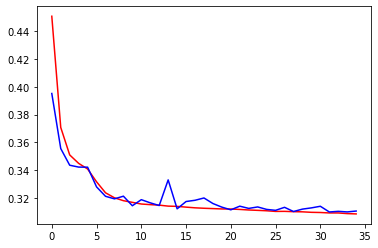

In [57]:
import matplotlib.pyplot as plt
fix, ax1 = plt.subplots(1,1)
ax1.plot(loss_by_epoch, color='red')
ax1.plot(val_loss_by_epoch, color='blue')

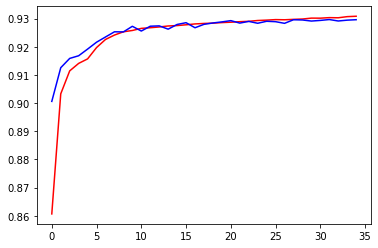

In [58]:
import matplotlib.pyplot as plt
fix, ax1 = plt.subplots(1,1)
ax1.plot(auc_by_epoch, color='red')
ax1.plot(val_auc_by_epoch, color='blue')

In [59]:
# Test sin embedded

nnet.to(device)

nnet.train(False)

test_total_loss = 0

for i, data in enumerate(test_dataloader):

    # obtener los datos del batch
    X_batch, y_batch = data
    X_batch = X_batch.to(device).float()
    y_batch = y_batch.to(device).float()

    # forward
    optimizer.zero_grad()
    nnet_output = nnet(X_batch)
    y_batch_hat = torch.sigmoid(nnet_output).reshape(-1, 1)
    y_batch = y_batch.reshape(-1, 1)

    # compute loss
    test_loss = loss_function(nnet_output, y_batch)

    # acumular el loss
    test_total_loss = test_total_loss + test_loss.item() 

print('================================================')    
print(f'Test loss : {test_total_loss/len(test_ds)}')
print('================================================')    


Test loss : 0.3151719947124214


## Con embeddings

### Recupero los datos 

In [60]:
#break

In [61]:
X = X_copia.copy()

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Occupation                     550068 non-null  int64  
 2   Marital_Status                 550068 non-null  int64  
 3   Product_Category_1             550068 non-null  int64  
 4   Product_Category_2             550068 non-null  float64
 5   Gender_F                       550068 non-null  uint8  
 6   Gender_M                       550068 non-null  uint8  
 7   Age_0-17                       550068 non-null  uint8  
 8   Age_18-25                      550068 non-null  uint8  
 9   Age_26-35                      550068 non-null  uint8  
 10  Age_36-45                      550068 non-null  uint8  
 11  Age_46-50                      550068 non-null  uint8  
 12  Age_51-55                     

In [63]:
# Se elimina el feature que mas nulos tiene
X = X.drop(['User_ID'], axis=1)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Gender_F                       550068 non-null  uint8  
 5   Gender_M                       550068 non-null  uint8  
 6   Age_0-17                       550068 non-null  uint8  
 7   Age_18-25                      550068 non-null  uint8  
 8   Age_26-35                      550068 non-null  uint8  
 9   Age_36-45                      550068 non-null  uint8  
 10  Age_46-50                      550068 non-null  uint8  
 11  Age_51-55                      550068 non-null  uint8  
 12  Age_55+                       

In [65]:
X = X.to_numpy()

### Normalizado de datos

In [66]:
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0)) 

In [67]:
print(X.shape)
print((np.min(X, axis=0)).shape)
print(np.min(X_norm, axis=0))
print(np.max(X_norm, axis=0))

(550068, 21)
(21,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Split en train, validation y test

In [68]:
train_cant = 0.70
valid_cant = 0.20
test_cant = 0.10
n_datos = X.shape[0]
idx = np.random.permutation(np.arange(0, n_datos))
train_idx = idx[0:int(train_cant * n_datos)]
valid_idx = idx[int(train_cant * n_datos): int((train_cant+valid_cant) * n_datos)]
test_idx = idx[int((train_cant+valid_cant) * n_datos):]

In [69]:
print(type(y))
y = np.array(y.tolist())
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [70]:
print('Train')
X_train = X_norm[train_idx]
y_train = y[train_idx]
print(X_train.shape)
print(y_train.shape)

print('Validation')
X_valid = X_norm[valid_idx]
y_valid = y[valid_idx]
print(X_valid.shape)
print(y_valid.shape)

print('Test')
X_test = X_norm[test_idx]
y_test = y[test_idx]
print(X_test.shape)
print(y_test.shape)

Train
(385047, 21)
(385047,)
Validation
(110014, 21)
(110014,)
Test
(55007, 21)
(55007,)


In [71]:
print(f'Train : {train_idx.shape}')
print(f'Valid : {valid_idx.shape}')
print(f'test : {test_idx.shape}')
print(f'Usuarios unicos : {len(user_id.unique())}')
print(f'Productos unicos : {len(product_id.unique())}')

Train : (385047,)
Valid : (110014,)
test : (55007,)
Usuarios unicos : 5891
Productos unicos : 3631


In [72]:
print(user_id.unique())
print(product_id.unique())

[1000001 1000002 1000003 ... 1004113 1005391 1001529]
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']


In [73]:
# mapea User_ID id a user index 
unique_User_ID = np.unique(user_id)
index_User_ID = np.arange(0, len(unique_User_ID)) # [0,1,...]
User_ID_to_index = {key:value for key, value in zip(unique_User_ID, index_User_ID)}

In [74]:
print(user_id[0])
print(User_ID_to_index[user_id[0]])
#print(User_ID_to_index)

1000001
0


In [75]:
user_idx = np.array([User_ID_to_index[u] for u in user_id])
print(f'Maximo User ID : {user_idx.max()}')
print(f'Minimo User ID : {user_idx.min()}')
print(f'Cantidad User IDs : {len(user_idx)}')

Maximo User ID : 5890
Minimo User ID : 0
Cantidad User IDs : 550068


In [76]:
# map Product_ID id a product index 
unique_Product_ID = np.unique(product_id)
index_Product_ID = np.arange(0, len(unique_Product_ID)) 
Product_ID_to_index = {key:value for key, value in zip(unique_Product_ID, index_Product_ID)}

In [77]:
print(product_id[0])
print(Product_ID_to_index[product_id[0]])

P00069042
672


In [78]:
product_idx = np.array([Product_ID_to_index[p] for p in product_id])
print(f'Maximo Product ID : {product_idx.max()}')
print(f'Minimo Product ID : {product_idx.min()}')
print(f'Cantidad Product IDs : {len(product_idx)}')

Maximo Product ID : 3630
Minimo Product ID : 0
Cantidad Product IDs : 550068


In [79]:
class MyDatasetWithEmb1(Dataset):

    def __init__(self, X, user_idx, product_idx, y):
        super().__init__()
        self.X = X
        self.user_idx = user_idx
        self.product_idx = product_idx
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.user_idx[idx], self.product_idx[idx], self.y[idx]

In [80]:
# Se establecen los indices para los datasets
user_index_train = user_idx[train_idx]
user_index_valid = user_idx[valid_idx]
user_index_test = user_idx[test_idx]

product_index_train = product_idx[train_idx]
product_index_valid = product_idx[valid_idx]
product_index_test = product_idx[test_idx]

In [81]:
X_train

array([[0.8       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.        , 0.36842105, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05      , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85      , 1.        , 0.26315789, ..., 0.        , 1.        ,
        0.        ],
       [0.1       , 1.        , 0.21052632, ..., 0.        , 1.        ,
        0.        ]])

In [82]:
# Se crean los dataset para la red con embedded
train_ds1 = MyDatasetWithEmb1(X_train, user_index_train, product_index_train, y_train)
valid_ds1 = MyDatasetWithEmb1(X_valid, user_index_valid, product_index_valid, y_valid)
test_ds1 = MyDatasetWithEmb1(X_test, user_index_test, product_index_test, y_test)

In [83]:
# Se crean los dataloader para la red con embedded
train_dataloader1 = DataLoader(train_ds1, batch_size=64, shuffle=True)
valid_dataloader1 = DataLoader(valid_ds1, batch_size=64, shuffle=True)
test_dataloader1 = DataLoader(test_ds1, batch_size=1, shuffle=True)

In [84]:
# Se muestran los datos para la red con embedded
x, user, prod, y = next(iter(train_dataloader1))
print(x.shape)
print(user.shape)
print(prod.shape)
print(y.shape)

print(x.dtype)
print(user.reshape(-1, 1).dtype)
print(prod.reshape(-1, 1).dtype)
print(y.dtype)

torch.Size([64, 21])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.float64
torch.int32
torch.int32
torch.int32


In [85]:
# Red con embedding para User_ID y Product_ID

class NNetWithEmb1(torch.nn.Module):

    def __init__(self, num_users, num_products, du, dp):
        super().__init__()
        self.embedding1 = torch.nn.Embedding(num_embeddings=num_users, embedding_dim=du)
        self.embedding2 = torch.nn.Embedding(num_embeddings=num_products, embedding_dim=dp)        
        self.linear_1 = torch.nn.Linear(in_features=(21 + du + dp), out_features=30, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.dropout1 = torch.nn.Dropout(0.30)
        self.linear_2 = torch.nn.Linear(in_features=30, out_features=5, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.dropout2 = torch.nn.Dropout(0.30)
        self.output = torch.nn.Linear(in_features=5, out_features=1, bias=True)

    def forward(self, x, user_idx, product_idx):
        user_emb = self.embedding1(user_idx)
        product_emb = self.embedding2(product_idx)
        final_input = torch.cat([x, user_emb, product_emb], dim=1)       
        x = self.linear_1(final_input)    
        x = self.relu_1(x)   
        x = self.dropout1(x)
        x = self.linear_2(x)   
        x = self.relu_2(x)  
        x = self.dropout2(x)
        x = self.output(x)     
        return x       

In [86]:
user_idx.max()

5890

In [87]:
# Se crea la red con embedded
nnet1 = NNetWithEmb1(len(unique_User_ID), len(unique_Product_ID), 8, 6)
print(nnet1)

NNetWithEmb1(
  (embedding1): Embedding(5891, 8)
  (embedding2): Embedding(3631, 6)
  (linear_1): Linear(in_features=35, out_features=30, bias=True)
  (relu_1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (linear_2): Linear(in_features=30, out_features=5, bias=True)
  (relu_2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (output): Linear(in_features=5, out_features=1, bias=True)
)


In [88]:
# Definicion funcion de perdida y optimizador
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")
#optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)
optimizer1 = torch.optim.Adam(nnet1.parameters(), lr=0.001)

In [89]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

In [90]:
device

'cpu'

In [91]:
type(X_batch)
np.shape(X_batch)

torch.Size([1, 22])

In [92]:
# Entrenamiento y validacion con embedded

nnet1.to(device)

loss_by_epoch = []
auc_by_epoch = []

val_loss_by_epoch = []
val_auc_by_epoch = []

epocas = 35

start_time = timeit.default_timer()
for epoch in range(epocas):

    #########################################################################
    ####### TRAINING
    #########################################################################

    nnet1.train(True)

    epoch_loss = 0
    epoch_y_score = []
    epoch_y_label = []

    for i, data in enumerate(train_dataloader1):

        # obtener los datos del batch
        X_batch, User_embed, Prod_embed, y_batch = data        

        User_embed = User_embed.to(device).int()
        Prod_embed = Prod_embed.to(device).int()
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        
        # forward
        optimizer1.zero_grad()

        nnet_output = nnet1(X_batch, User_embed, Prod_embed) #, torch.tensor(embe))
        
        y_batch_hat = torch.sigmoid(nnet_output).reshape(-1, 1)
        y_batch = y_batch.reshape(-1, 1)

        # compute loss
        loss = loss_function(nnet_output, y_batch)

        # backpropagation
        loss.backward()

        # actualizar los parameteros
        optimizer1.step()

        # acumular el loss
        epoch_loss = epoch_loss + loss.item() 
        epoch_y_score += list(y_batch_hat.detach().cpu().numpy())
        epoch_y_label += list(y_batch.detach().cpu().numpy()) 


    loss_by_epoch.append(epoch_loss / len(train_ds1))
    
    # compute AUC
    fpr, tpr, _ = metrics.roc_curve(epoch_y_label, epoch_y_score)
    auc = metrics.auc(fpr, tpr)
    auc_by_epoch.append(auc)


    #########################################################################
    ####### VALIDACION
    #########################################################################

    nnet1.train(False)

    val_epoch_loss = 0
    val_epoch_y_score = []
    val_epoch_y_label = []

    for i, data in enumerate(valid_dataloader1):
        
        # obtener los datos del batch
        X_batch, User_embed, Prod_embed, y_batch = data  
        

        User_embed = User_embed.to(device).int()
        Prod_embed = Prod_embed.to(device).int()
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer1.zero_grad()
        nnet_output = nnet1(X_batch, User_embed, Prod_embed) 
    
        y_batch_hat = torch.sigmoid(nnet_output).reshape(-1, 1)
        y_batch = y_batch.reshape(-1, 1)

        # compute loss
        loss = loss_function(nnet_output, y_batch)

        # acumular el loss
        val_epoch_loss = val_epoch_loss + loss.item() 
        val_epoch_y_score += list(y_batch_hat.detach().cpu().numpy())
        val_epoch_y_label += list(y_batch.detach().cpu().numpy()) 


    val_loss_by_epoch.append(val_epoch_loss / len(valid_ds1))
    
    # compute AUC
    fpr, tpr, _ = metrics.roc_curve(val_epoch_y_label, val_epoch_y_score)
    val_auc = metrics.auc(fpr, tpr)
    val_auc_by_epoch.append(val_auc)

    #########################################################################
    ####### IMPRESION DE EPOCH
    #########################################################################

    #print(f"Epoch: {epoch} | Training loss: {epoch_loss / n} | AUC: {auc}")
    print(f"E: {epoch} | Tr.loss: {epoch_loss / len(train_ds1)} | AUC: {auc}, Val.loss: {val_epoch_loss / len(valid_ds1)} | AUC: {val_auc} ")

# Medicion de tiempo
elapsed = timeit.default_timer() - start_time
print(f'El entrenamiento duró {elapsed} segundos')

E: 0 | Tr.loss: 0.47334061936013244 | AUC: 0.8498001756373124, Val.loss: 0.33599956196807806 | AUC: 0.9272703507408324 
E: 1 | Tr.loss: 0.3361302110433152 | AUC: 0.9247443600893359, Val.loss: 0.29375413092316527 | AUC: 0.9439921984263802 
E: 2 | Tr.loss: 0.308033758770554 | AUC: 0.9368315831595184, Val.loss: 0.28088679520754034 | AUC: 0.9487488680295553 
E: 3 | Tr.loss: 0.2964195598348158 | AUC: 0.9416118174919975, Val.loss: 0.2750219263511984 | AUC: 0.9510208965380074 
E: 4 | Tr.loss: 0.28916662990559755 | AUC: 0.9446060151872753, Val.loss: 0.2713384239029576 | AUC: 0.9522121282536229 
E: 5 | Tr.loss: 0.28409506981520083 | AUC: 0.9464538723979985, Val.loss: 0.2688285447923263 | AUC: 0.9526590982024774 
E: 6 | Tr.loss: 0.2812498971432998 | AUC: 0.9475936049005482, Val.loss: 0.267796798098 | AUC: 0.9531348673774864 
E: 7 | Tr.loss: 0.2785679447642767 | AUC: 0.9486354499162769, Val.loss: 0.2674030611683954 | AUC: 0.9533182038505246 
E: 8 | Tr.loss: 0.2769317819968106 | AUC: 0.94929951807

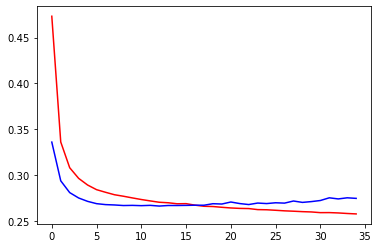

In [93]:
import matplotlib.pyplot as plt
fix, ax1 = plt.subplots(1,1)
ax1.plot(loss_by_epoch, color='red')
ax1.plot(val_loss_by_epoch, color='blue')

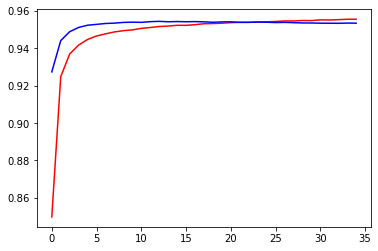

In [94]:
import matplotlib.pyplot as plt
fix, ax1 = plt.subplots(1,1)
ax1.plot(auc_by_epoch, color='red')
ax1.plot(val_auc_by_epoch, color='blue')

In [95]:
# Test con embedded

nnet1.to(device)

nnet1.train(False)

test_total_loss = 0

for i, data in enumerate(test_dataloader1):

    # obtener los datos del batch
    X_batch, User_embed, Prod_embed, y_batch = data  

    User_embed = User_embed.to(device).int()
    Prod_embed = Prod_embed.to(device).int()
    X_batch = X_batch.to(device).float()
    y_batch = y_batch.to(device).float()

    # forward
    optimizer1.zero_grad()
    nnet_output = nnet1(X_batch, User_embed, Prod_embed) 

    y_batch_hat = torch.sigmoid(nnet_output).reshape(-1, 1)
    y_batch = y_batch.reshape(-1, 1)

    # compute loss
    test_loss = loss_function(nnet_output, y_batch)

    # acumular el loss
    test_total_loss = test_total_loss + test_loss.item() 

print('================================================')    
print(f'Test loss : {test_total_loss/len(test_ds)}')
print('================================================')    


Test loss : 0.27297652602635114
